In [1]:
import scanpy as sc
import pandas as pd
import mudata as mu
import numpy as np

## Visualize Russell Results

In [2]:
sc.set_figure_params(dpi_save=300, dpi=100, frameon=False)

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


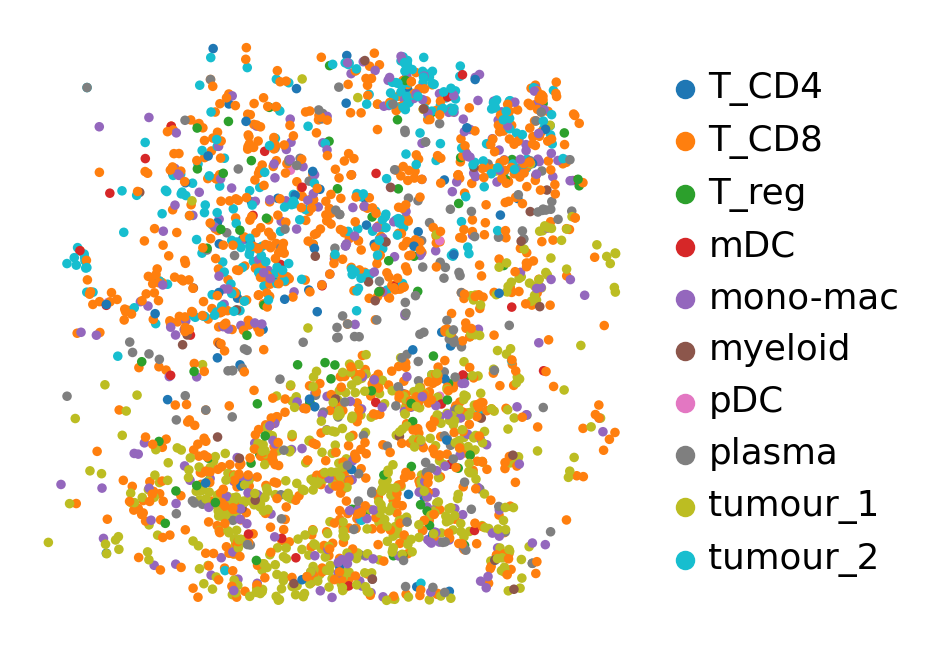

In [ ]:
russell_sc = mu.read_h5mu("/vol/storage/data/simulations/russel_ref.h5mu")
sc.pl.embedding(russell_sc.mod["atac"], basis = "spatial", color = "cell_type",  title='', save=True)

In [ ]:
russell = mu.read_h5mu("/vol/storage/data/simulations/russell_250.h5mu")

In [ ]:
# Caculate the most probable cluster assignment
max_prob_cluster = np.argmax(russell.mod["atac"].obsm["proportions"], axis=1)
# Get the column names
cluster_id = russell.mod["atac"].uns["proportion_names"]
russell.mod["atac"].obs["ground truth"] = cluster_id[max_prob_cluster]
russell.mod["atac"].obs['ground truth'] = pd.Categorical(russell.mod["atac"].obs['ground truth'], categories=russell_sc.mod["atac"].obs.cell_type.cat.categories)
russell.mod["atac"].uns["ground truth_colors"] = russell_sc.mod["atac"].uns["cell_type_colors"].copy()

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


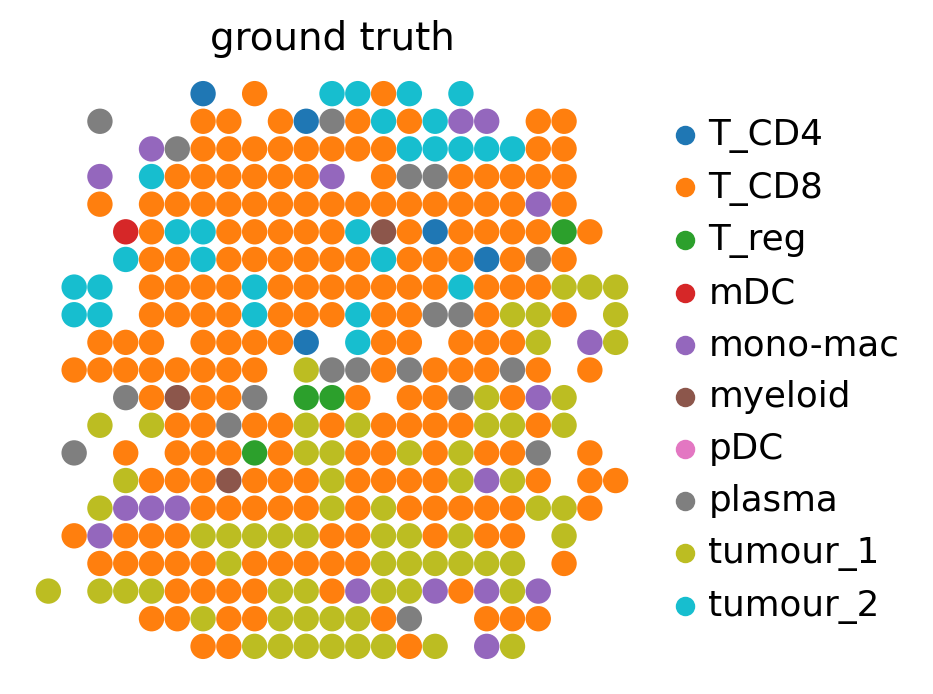

In [27]:
sc.pl.embedding(russell.mod["atac"], basis = "spatial", color = "ground truth", save="gt")

### Cell2Location

In [29]:
russell_atac_ha = "/vol/storage/data/deconvolution_results/cell2location/atac/russell_250_highly_accessible/means_cell_abundance_w_sf.csv"
russell_atac_hv = "/vol/storage/data/deconvolution_results/cell2location/atac/russell_250_highly_variable/means_cell_abundance_w_sf.csv"
russell_rna = "/vol/storage/data/deconvolution_results/cell2location/rna/russell_250_highly_variable/means_cell_abundance_w_sf.csv"
results = [russell_atac_ha, russell_rna, russell_atac_hv]

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


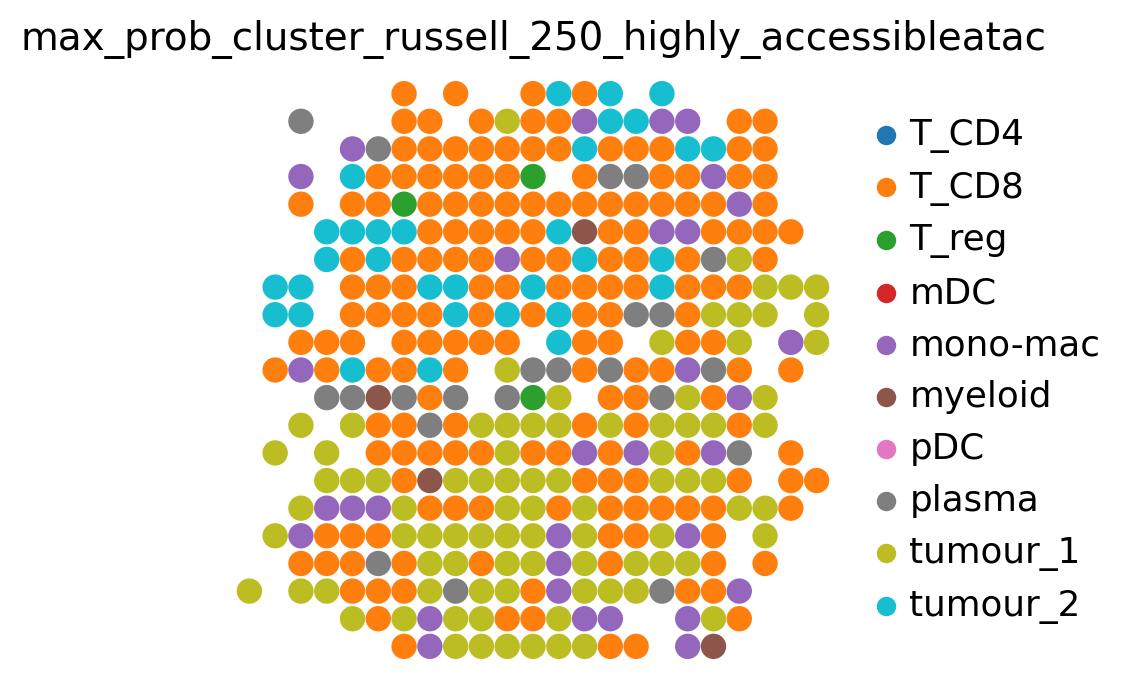

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


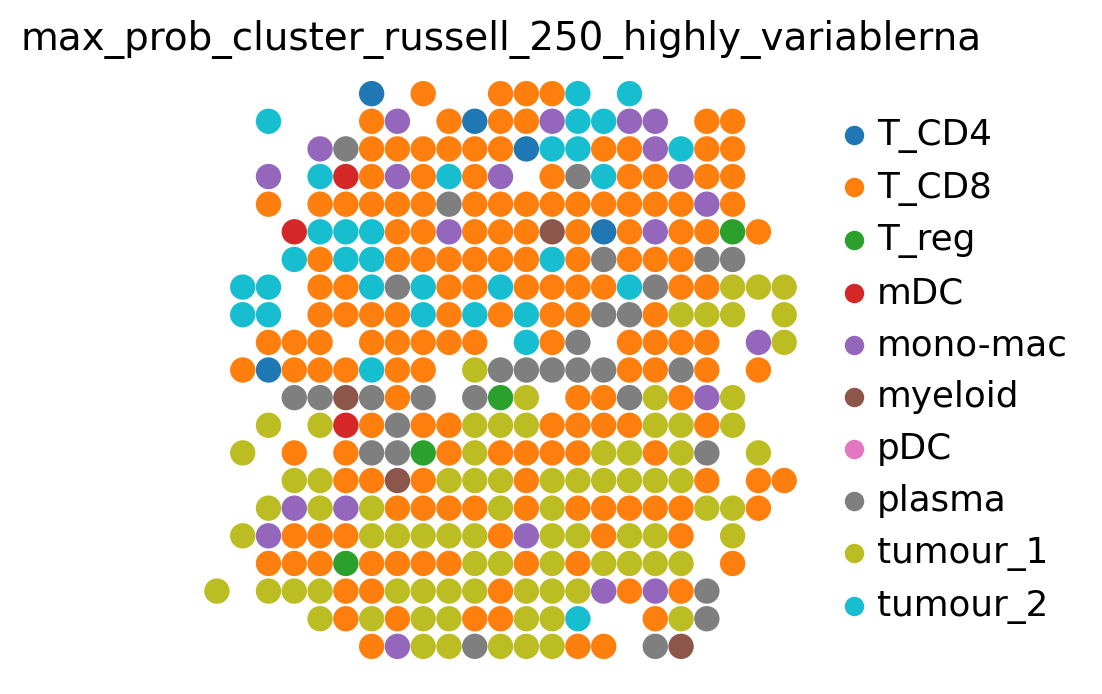

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


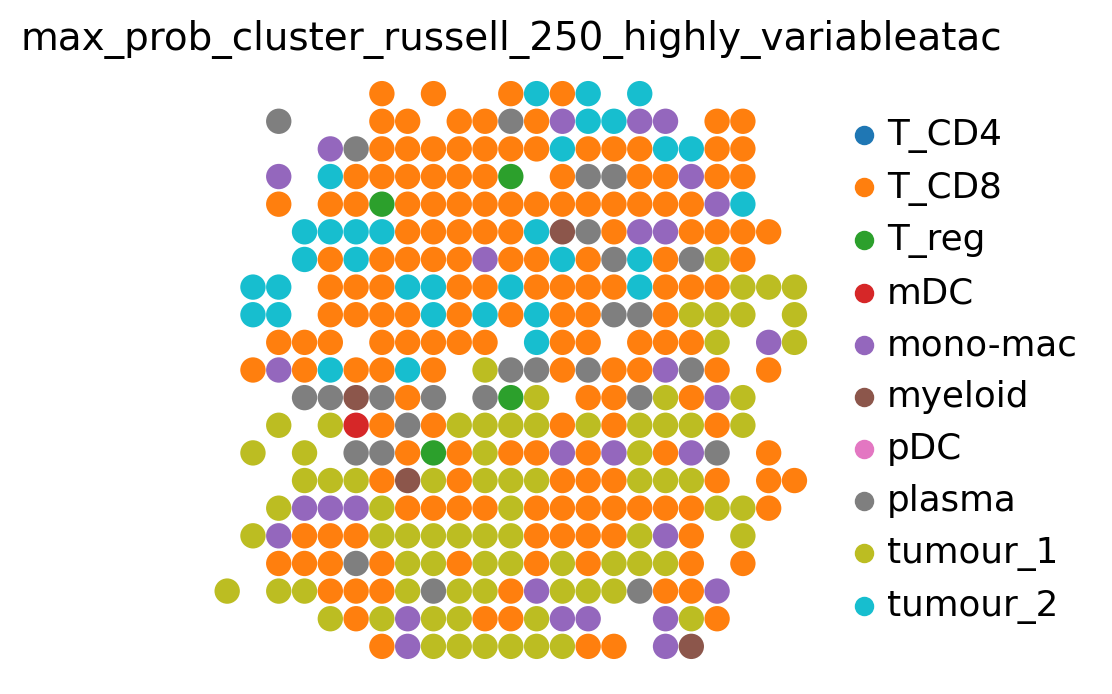

In [33]:
for result in results:
    dt = pd.read_csv(result, index_col=0)
    dt.columns = dt.columns.str.removeprefix("meanscell_abundance_w_sf_")
    curr = result.split("/")[-2]
    mod = result.split("/")[-3]
    dt.index = russell.obs.index
    
    russell.obsm[curr] = dt
    # Caculate the most probable cluster assignment
    max_prob_cluster = np.argmax(russell.obsm[curr], axis=1)
    # Get the column names
    cluster_id = dt.columns.to_numpy()
    russell.mod["atac"].obs['max_prob_cluster_' + curr + mod] = cluster_id[max_prob_cluster]
    russell.mod["atac"].obs['max_prob_cluster_' + curr + mod] = pd.Categorical(russell.mod["atac"].obs['max_prob_cluster_'+ curr + mod]
                                                                               , categories=russell_sc.mod["atac"].obs.cell_type.cat.categories)
    russell.mod["atac"].uns['max_prob_cluster_' + curr + mod + "_colors"] = russell_sc.mod["atac"].uns["cell_type_colors"].copy()
    sc.pl.embedding(russell.mod["atac"], basis = "spatial", color = "max_prob_cluster_"+ curr + mod, save= result.split("/")[-4]+curr+mod)
    


### RCTD

In [34]:
russell_atac_ha = "/vol/storage/data/deconvolution_results/rctd/atac/russell_250_highly_accessible/estimated_proportions.csv"
russell_atac_hv = "/vol/storage/data/deconvolution_results/rctd/atac/russell_250_highly_variable/estimated_proportions.csv"
russell_rna = "/vol/storage/data/deconvolution_results/rctd/rna/russell_250_highly_variable/estimated_proportions.csv"
results = [russell_atac_ha, russell_rna, russell_atac_hv]

Index(['T_CD4', 'T_CD8', 'T_reg', 'mDC', 'mono-mac', 'myeloid', 'pDC',
       'plasma', 'tumour_1', 'tumour_2'],
      dtype='object')


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


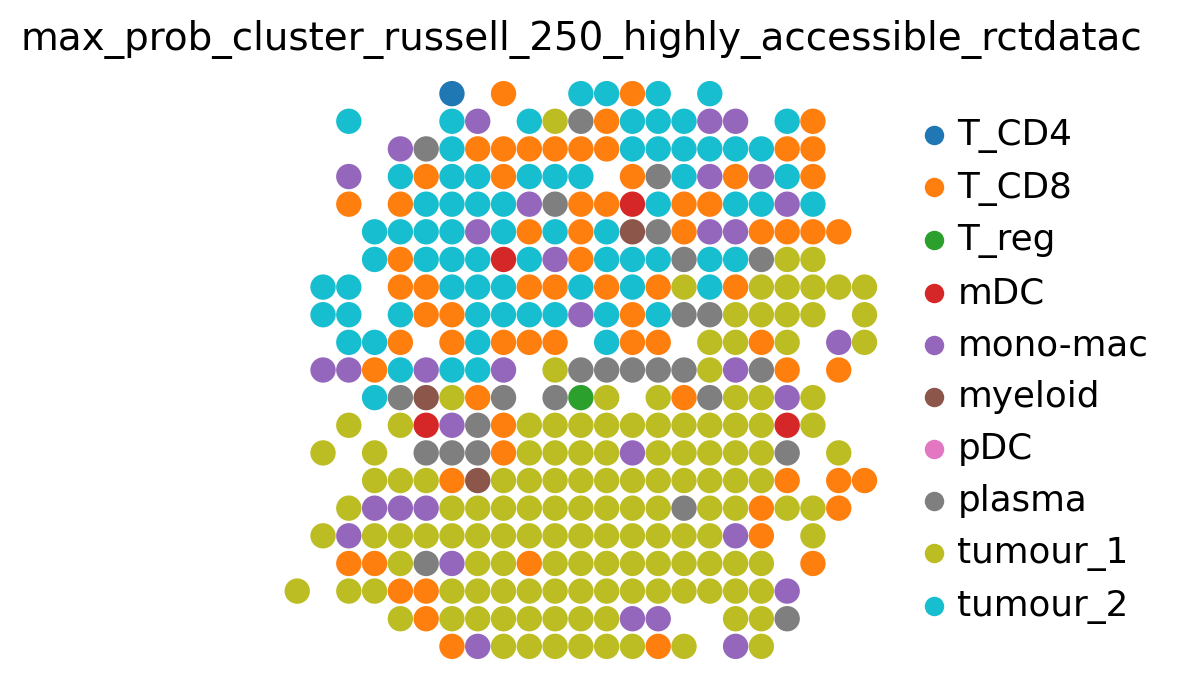

Index(['T_CD4', 'T_CD8', 'T_reg', 'mDC', 'mono-mac', 'myeloid', 'pDC',
       'plasma', 'tumour_1', 'tumour_2'],
      dtype='object')


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


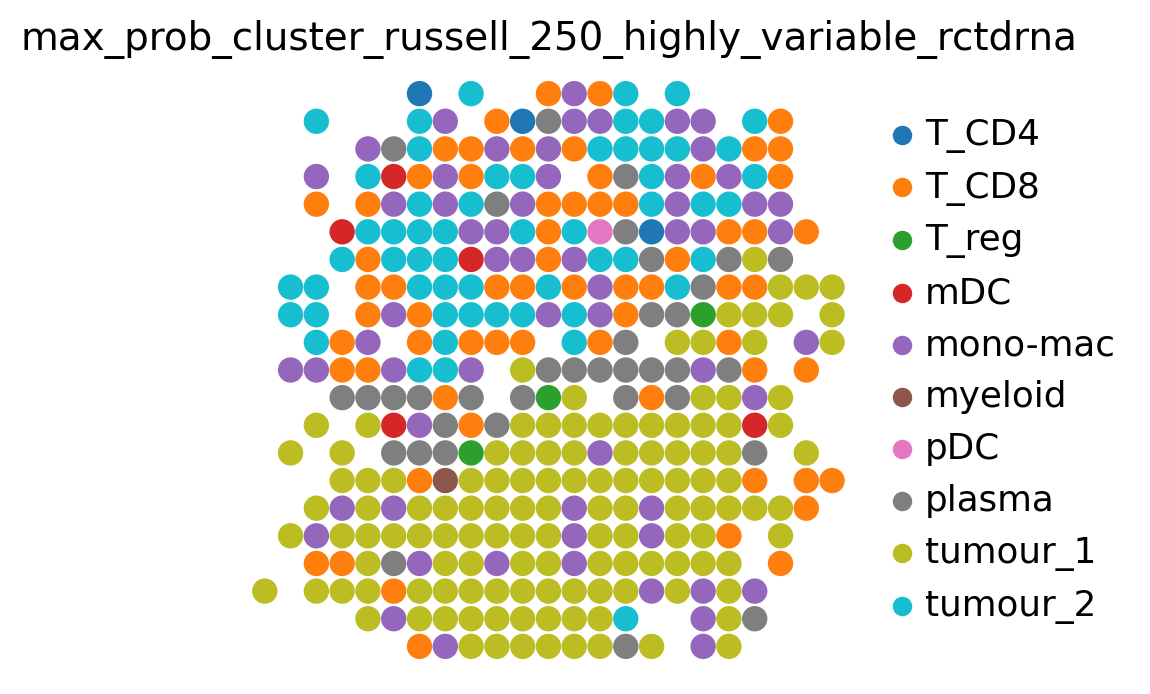

Index(['T_CD4', 'T_CD8', 'T_reg', 'mDC', 'mono-mac', 'myeloid', 'pDC',
       'plasma', 'tumour_1', 'tumour_2'],
      dtype='object')


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


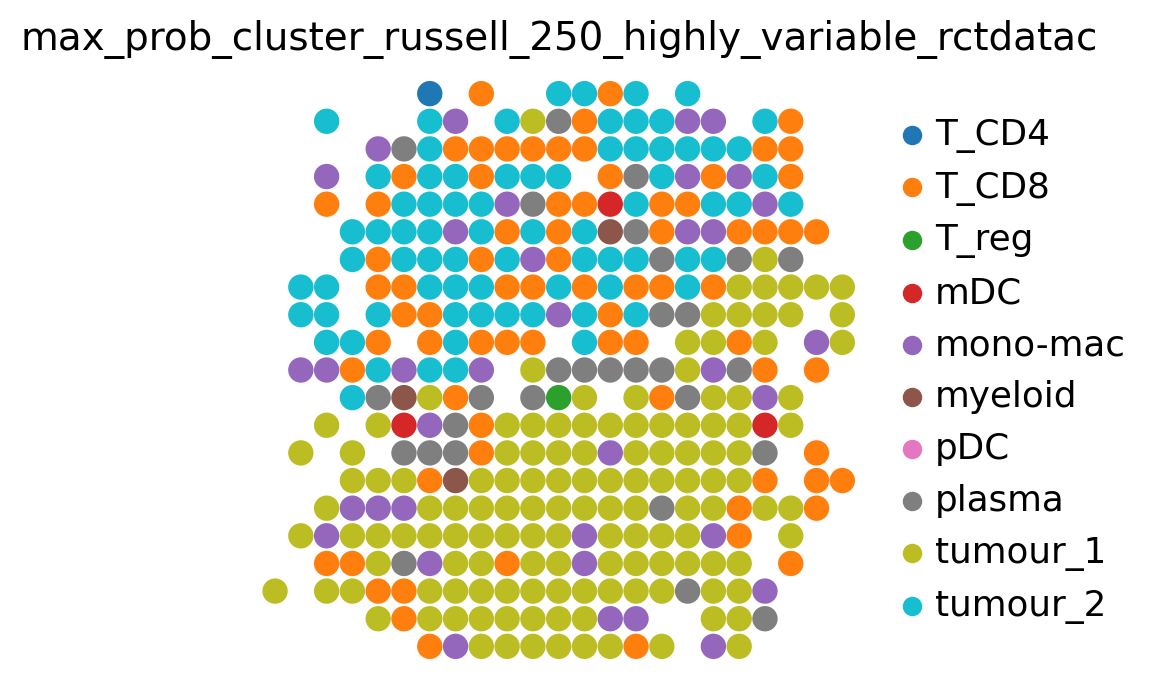

In [35]:
for result in results:
    dt = pd.read_csv(result, index_col=0)
    print(dt.columns)
    curr = result.split("/")[-2] + "_rctd"
    mod = result.split("/")[-3]
    dt.index = russell.obs.index
    russell.obsm[curr] = dt
    # Caculate the most probable cluster assignment
    max_prob_cluster = np.argmax(russell.obsm[curr], axis=1)
    # Get the column names
    cluster_id = dt.columns.to_numpy()
    russell.mod["atac"].obs['max_prob_cluster_' + curr + mod] = cluster_id[max_prob_cluster]
    russell.mod["atac"].obs["max_prob_cluster_" + curr + mod] = pd.Categorical(
        russell.mod["atac"].obs["max_prob_cluster_" + curr + mod],
        categories=russell_sc.mod["atac"].obs.cell_type.cat.categories,
    )
    russell.mod["atac"].uns['max_prob_cluster_' + curr + mod + "_colors"] = russell_sc.mod["atac"].uns["cell_type_colors"].copy()
    sc.pl.embedding(russell.mod["atac"], basis = "spatial", color = "max_prob_cluster_"+ curr + mod,save= result.split("/")[-4]+curr+mod)